In [1]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'
SS_VER='SS_VER_1_1'

In [2]:
%run "Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [17]:
import chipwhisperer as cw
scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial)

In [49]:
scope.io.clkout = 60000000
scope.adc.clk_freq = 0
scope.adc.samples = 100000
target.baud = 2000000

In [1]:
print(scope)
print(target)

NameError: name 'scope' is not defined

In [5]:
print(scope.sn)
print(scope.sam_build_date)

533331003257394c3130333030333035
13:19:36 Aug 20 2021


In [37]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "ldr-state.hex")

Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 9713 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 9713 bytes


In [53]:
from tqdm.notebook import tnrange
import numpy as np
import time

trace_array = []

N = 1
for i in tnrange(N, desc='Capturing traces'):
    scope.arm()
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    trace_array.append(scope.get_last_trace())

Capturing traces:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


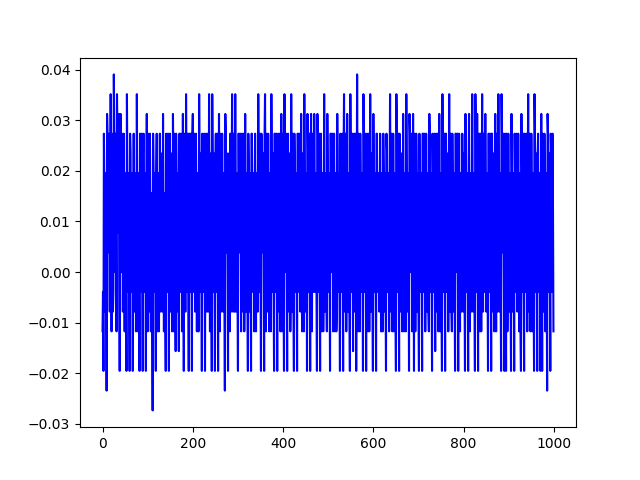

In [58]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.figure()
plt.plot(trace_array[0][0:1000], 'b')
plt.show()

In [10]:
with open('ldr-state.npy', 'wb') as f:
    np.save(f, trace_array)

In [51]:
scope.dis()
target.dis()